In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Работа с данными в R


### Табличные данные

#### Создание таблиц

In [2]:
# заполнение таблицы данными
t <- data.frame(matrix(nrow = 3, ncol = 4, data = 1:12))

# названия столбцов
colnames(t) <- c('x', 'x2', 'y')

# количество строк/столбцов
nrow(t)
ncol(t)

t

[1] 3

[1] 4

x,x2,y,NA
<int>,<int>,<int>,<int>
1,4,7,10
2,5,8,11
3,6,9,12


#### Столбцы

In [3]:
# первый столбец
t[[1]]  
t[1]
t[,1]

[1] 1 2 3

x
<int>
1
2
3


[1] 1 2 3

#### Строки, элементы и подматрицы

In [4]:
# первая строка
t[1,]  

# третий элемент второй строки
t[2, 3]

# подматрица
t[c(1, 3), c(2, 4)]

,x,x2,y,NA
,<int>,<int>,<int>,<int>
1,1,4,7,10


[1] 8

,x2,NA
,<int>,<int>
1,4,10
3,6,12


#### Изменение значений
К столбцу можно обращаться по имени столбца в таблице через table$name_of_col. 

In [5]:
# обращение к столбцу x
t$x

t$x[2] <- 100
t

[1] 1 2 3

x,x2,y,NA
<dbl>,<int>,<int>,<int>
1,4,7,10
100,5,8,11
3,6,9,12


#### Строки, удовлетворяющие условию

In [6]:
t[(t$x2 > 4) & (t$y < 9), ]

,x,x2,y,NA
,<dbl>,<int>,<int>,<int>
2,100,5,8,11


####**Упражнение** 
Создайте датасет из 1000 строк и 5 столбцов с помощью генерации случайных чисел от 0 до 100. Присвойте столбцам некоторые имена. Посчитайте количество строк, для которых сумма квадратов значений в первых двух столбцах не превосходит квадрата значения в четвертом столбце, а значение в пятом столбце меньше значения в третьем.

In [7]:
t <- data.frame(matrix(runif(n = 1000 * 5, min = 0, max = 100), ncol = 5))
colnames(t) <- c('cat', 'dog', 'snake', 'wolf', 'tiger')
t[1:5,]

,cat,dog,snake,wolf,tiger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26.98678,7.783464,13.42075,17.6466427,98.0183267
2,40.44542,48.624049,95.72715,15.6608640,0.4719082
3,15.99078,64.316097,15.40936,8.2642999,70.2805030
4,14.69729,94.804744,40.24890,0.7010472,47.4626039
5,78.53492,97.824100,62.77338,89.4443859,53.6884772


In [8]:
first_condition <- t$cat^2 + t$dog^2 <= t$wolf^2
second_condition <- t$tiger < t$snake
sum(first_condition & second_condition)

[1] 153

### Статистические методы

* `summary` — основные описательные статистики;
* `hist` — гистограмма;
* `qqnorm` — строит Q-Q plot, `qqline` — проводит прямую по точкам на Q-Q plot;
* `ks.test` — критерий Колмогорова (проверка гипотезы о принадлежности выборки некоторому распределению);
* `shapiro.test` — критерий Шапиро-Уилка (проверка гипотезы нормальности выборки);
* `density` — ядерная оценка плотности;
* `ecdf` — эмпирическая функция распределения;
* `lillie.test` — критерий Лиллиефорса (критерий Колмогорова для проверки нормальности), пакет `nortest`;
* `ad.test` — критерий Андерсона-Дарлинга;
* `cvm.test` — критерий Крамера-фон Мизеса;
* `jb.norm.test` — критерий Жарка-Бера для проверки нормальности, пакет `normtest`;
* `p.adjust` — множественная проверка гипотез

In [3]:
?shapiro.test

In [2]:
?density

In [11]:
?p.adjust

<a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/00Index.html">Полное описание пакета `stats`.</a>

<a href="https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html">Пакет `datasets`</a> —- встроенные в R датасеты.

### Wine Data Set 
http://archive.ics.uci.edu/ml/datasets/Wine

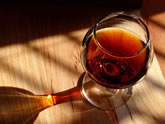


#### Читаем данные

In [12]:
t <- read.table('wine.data', sep=',')
t[1:5,]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Присвоение названий столбцам

In [13]:
colnames(t) <- c('Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 
                 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
                 'Color_intensity', 'Hue', 'OD_OD_of_diluted_wines', 'Proline')
t[1:5,]

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD_OD_of_diluted_wines,Proline
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Значения признака

In [14]:
t$Alcalinity_of_ash

[1] 15.6 11.2 18.6 16.8 21.0 15.2 14.6 17.6 14.0 16.0 18.0 16.8 16.0 11.4 12.0
 [16] 17.2 20.0 20.0 16.5 15.2 16.0 18.6 16.6 17.8 20.0 25.0 16.1 17.0 19.4 16.0
 [31] 22.5 19.1 17.2 19.5 19.0 20.5 15.5 18.0 15.5 13.2 16.2 18.8 15.0 17.5 17.0
 [46] 18.9 16.0 16.0 18.8 17.4 12.4 17.2 14.0 17.1 16.4 20.5 16.3 16.8 16.7 10.6
 [61] 16.0 16.8 18.0 19.0 19.0 18.1 15.0 19.6 17.0 16.8 20.4 25.0 24.0 30.0 21.0
 [76] 16.0 16.0 18.0 14.8 23.0 19.0 18.8 24.0 22.5 18.0 18.0 22.8 26.0 21.6 23.6
 [91] 18.5 22.0 20.7 18.0 18.0 19.0 21.5 16.0 18.5 18.0 17.5 18.5 21.0 19.5 20.5
[106] 22.0 19.0 22.5 19.0 20.0 19.5 21.0 20.0 21.0 22.5 21.5 20.8 22.5 16.0 19.0
[121] 20.0 28.5 26.5 21.5 21.0 21.0 21.5 28.5 24.5 22.0 18.0 20.0 24.0 21.5 17.5
[136] 18.5 21.0 25.0 19.5 24.0 21.0 20.0 23.5 20.0 18.5 21.0 20.0 21.5 21.5 21.5
[151] 24.0 22.0 25.5 18.5 20.0 22.0 19.5 27.0 25.0 22.5 21.0 20.0 22.0 18.5 22.0
[166] 22.5 23.0 19.5 24.5 25.0 19.0 19.5 20.0 20.5 23.0 20.0 20.0 24.5

Значения некоторых статистик для каждого признака

In [15]:
summary(t)

     Class          Alcohol        Malic_acid         Ash       
 Min.   :1.000   Min.   :11.03   Min.   :0.740   Min.   :1.360  
 1st Qu.:1.000   1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210  
 Median :2.000   Median :13.05   Median :1.865   Median :2.360  
 Mean   :1.938   Mean   :13.00   Mean   :2.336   Mean   :2.367  
 3rd Qu.:3.000   3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558  
 Max.   :3.000   Max.   :14.83   Max.   :5.800   Max.   :3.230  
 Alcalinity_of_ash   Magnesium      Total_phenols     Flavanoids   
 Min.   :10.60     Min.   : 70.00   Min.   :0.980   Min.   :0.340  
 1st Qu.:17.20     1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205  
 Median :19.50     Median : 98.00   Median :2.355   Median :2.135  
 Mean   :19.49     Mean   : 99.74   Mean   :2.295   Mean   :2.029  
 3rd Qu.:21.50     3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875  
 Max.   :30.00     Max.   :162.00   Max.   :3.880   Max.   :5.080  
 Nonflavanoid_phenols Proanthocyanins Color_intensity       Hue      

Структура датасета

In [16]:
str(t)

'data.frame':	178 obs. of  14 variables:
 $ Class                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol               : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_acid            : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                   : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity_of_ash     : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium             : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_phenols         : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids            : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_phenols  : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins       : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_intensity       : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                   : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD_OD_of_

Гистограмма

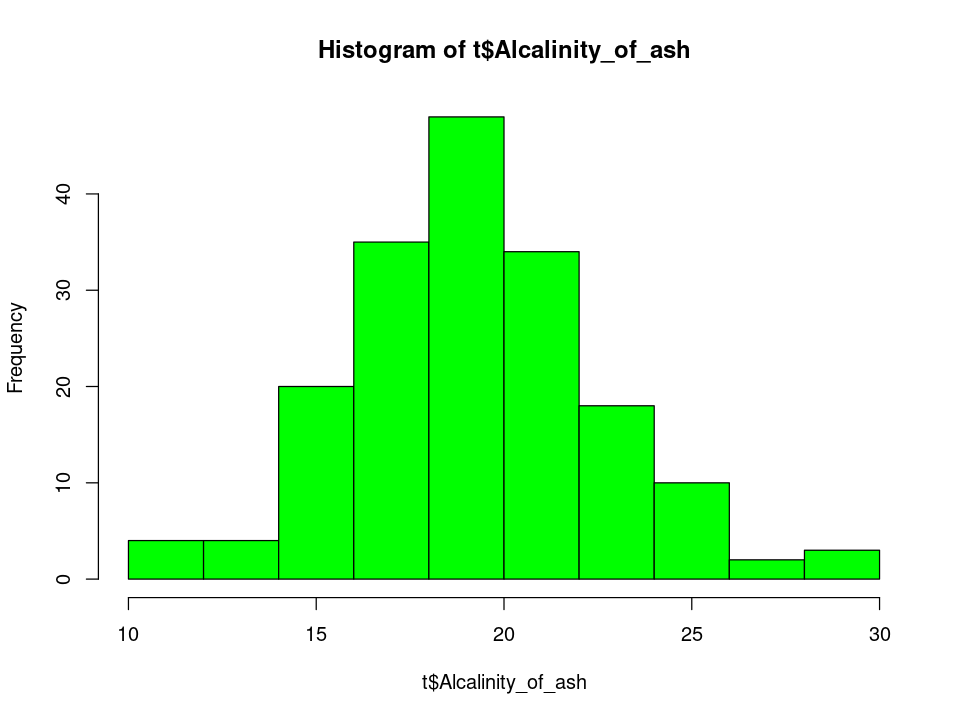

In [17]:
hist(t$Alcalinity_of_ash, col = 'green')

Строим QQ plot

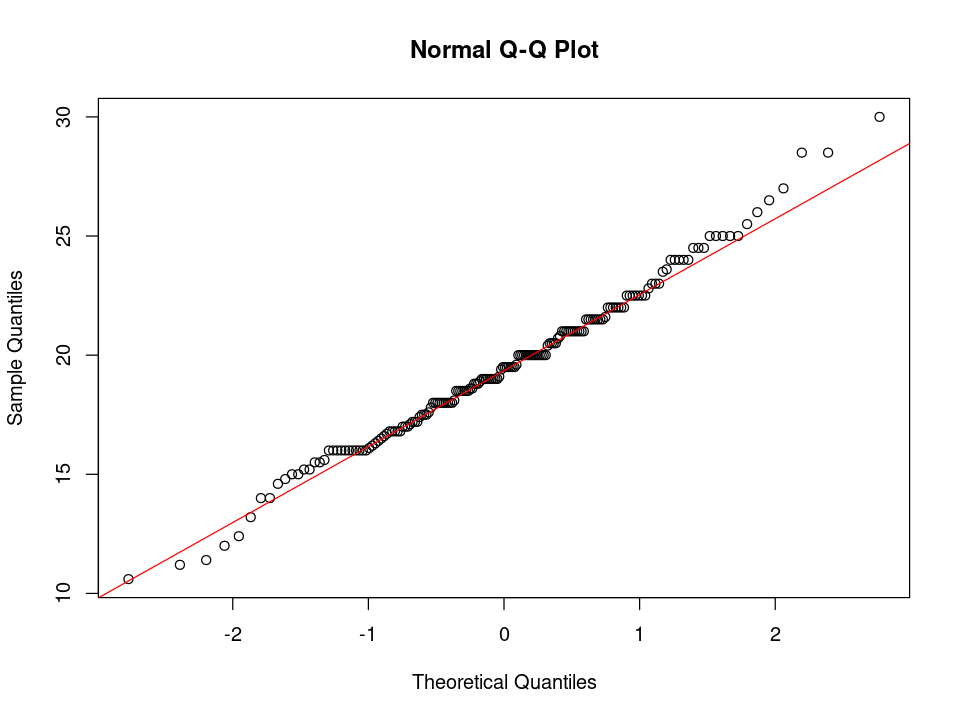

In [18]:
qqnorm(t$Alcalinity_of_ash)
qqline(t$Alcalinity_of_ash, col = 2)

Тест Колмогорова и тест Шапиро-Уилка для проверки нормальности

In [19]:
ks.test(t$Alcalinity_of_ash, pnorm, mean(t$Alcalinity_of_ash), sd(t$Alcalinity_of_ash))
shapiro.test(t$Alcalinity_of_ash)

Warning message in ks.test(t$Alcalinity_of_ash, pnorm, mean(t$Alcalinity_of_ash), :
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  t$Alcalinity_of_ash
D = 0.063491, p-value = 0.4698
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  t$Alcalinity_of_ash
W = 0.99023, p-value = 0.2639


График зависимости Alcalinity_of_ash от Flavanoids

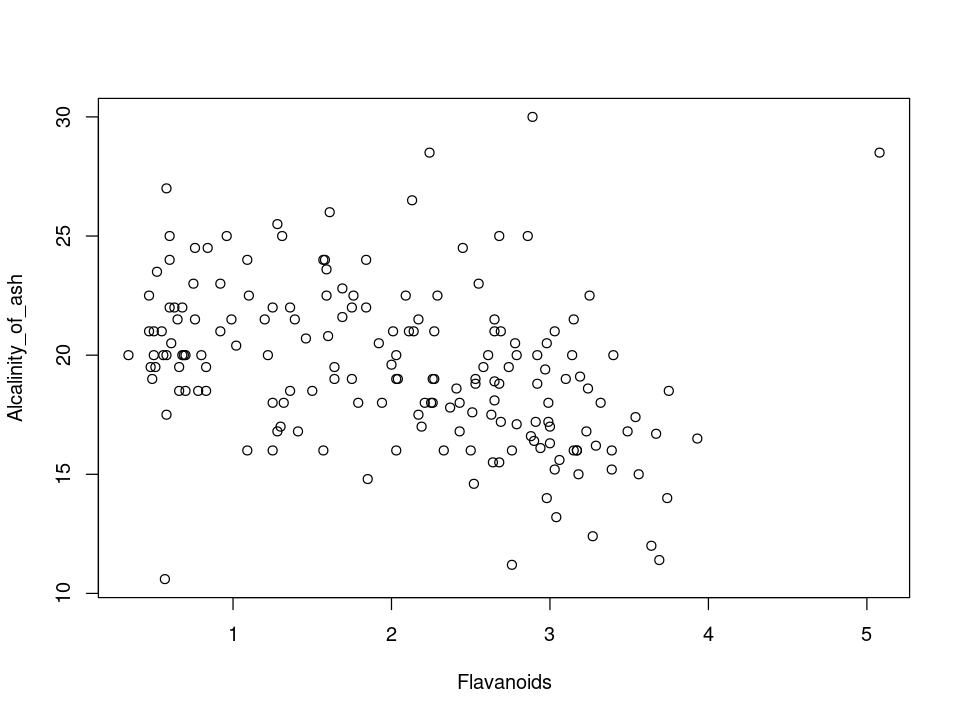

In [21]:
plot(Alcalinity_of_ash ~ Flavanoids, t)